In [1]:
unique_token = "backpack</w>"
class_token = "backpack"
prompt_list = [
'a {0} {1} in the jungle'.format(unique_token, class_token),
'a {0} {1} in the snow'.format(unique_token, class_token),
'a {0} {1} on the beach'.format(unique_token, class_token),
'a {0} {1} on a cobblestone street'.format(unique_token, class_token),
'a {0} {1} on top of pink fabric'.format(unique_token, class_token),
'a {0} {1} on top of a wooden floor'.format(unique_token, class_token),
'a {0} {1} with a city in the background'.format(unique_token, class_token),
'a {0} {1} with a mountain in the background'.format(unique_token, class_token),
'a {0} {1} with a blue house in the background'.format(unique_token, class_token),
'a {0} {1} on top of a purple rug in a forest'.format(unique_token, class_token),
'a {0} {1} with a wheat field in the background'.format(unique_token, class_token),
'a {0} {1} with a tree and autumn leaves in the background'.format(unique_token, class_token),
'a {0} {1} with the Eiffel Tower in the background'.format(unique_token, class_token),
'a {0} {1} floating on top of water'.format(unique_token, class_token),
'a {0} {1} floating in an ocean of milk'.format(unique_token, class_token),
'a {0} {1} on top of green grass with sunflowers around it'.format(unique_token, class_token),
'a {0} {1} on top of a mirror'.format(unique_token, class_token),
'a {0} {1} on top of the sidewalk in a crowded street'.format(unique_token, class_token),
'a {0} {1} on top of a dirt road'.format(unique_token, class_token),
'a {0} {1} on top of a white rug'.format(unique_token, class_token),
'a red {0} {1}'.format(unique_token, class_token),
'a purple {0} {1}'.format(unique_token, class_token),
'a shiny {0} {1}'.format(unique_token, class_token),
'a wet {0} {1}'.format(unique_token, class_token),
'a cube shaped {0} {1}'.format(unique_token, class_token)
]

In [2]:
import sys
sys.path.append("../")
from diffusers import StableDiffusionPipeline, EulerAncestralDiscreteScheduler
import torch
from lora_diffusion import tune_lora_scale, patch_pipe
import open_clip
from PIL import Image
from disen_net import Image_adapter
import os

model_id = "/DATA/DATANAS1/zhangyip/models/stable-diffusion-2-1-base"

with torch.no_grad():
    pipe = StableDiffusionPipeline.from_pretrained(model_id).to("cuda")
    img_model, _, preprocess = open_clip.create_model_and_transforms('ViT-H-14', pretrained='laion2b_s32b_b79k')
    img_model = img_model.to("cuda")

/home/chenhong/anaconda3/envs/diffusion/lib/python3.10/site-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


In [8]:
dir_path = "./output_dreambooth/our_versions/my_base/checkpoint"
patch_pipe(
    pipe,
    os.path.join(dir_path, "lora_weight_e416_s2500.pt"),
    patch_text=False,
    patch_ti=False,
    patch_unet=True,
)
tune_lora_scale(pipe.unet, 1.0)
adapter = Image_adapter().to("cuda")
info = torch.load(os.path.join(dir_path, "lora_weight_e416_s2500.img_adapter.pt"))
adapter.load_state_dict(info)
ref_image = preprocess(Image.open("/DATA/DATANAS1/chenhong/diffusion_research/dreambooth_data/backpack/01.jpg")).unsqueeze(0).to("cuda")

LoRA : Patching Unet


we are here


  0%|          | 0/50 [00:00<?, ?it/s]

a backpack</w> backpack in the jungle


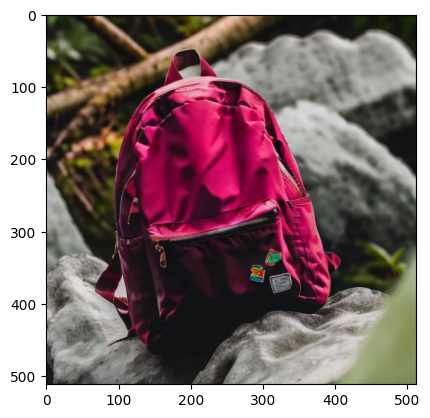

we are here


  0%|          | 0/50 [00:00<?, ?it/s]

a backpack</w> backpack in the snow


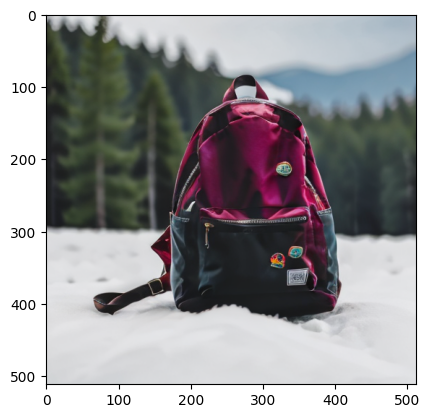

we are here


  0%|          | 0/50 [00:00<?, ?it/s]

a backpack</w> backpack on the beach


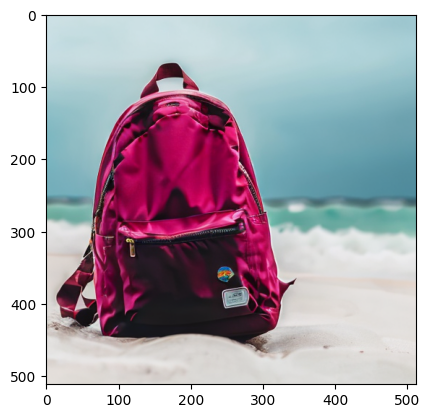

we are here


  0%|          | 0/50 [00:00<?, ?it/s]

a backpack</w> backpack on a cobblestone street


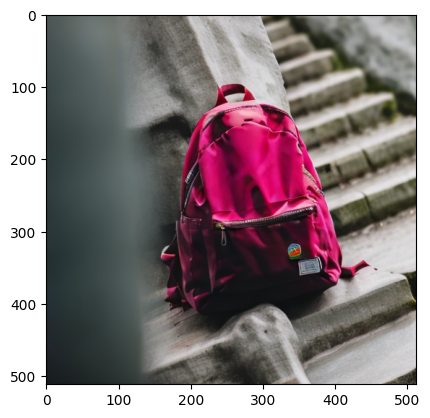

we are here


  0%|          | 0/50 [00:00<?, ?it/s]

a backpack</w> backpack on top of pink fabric


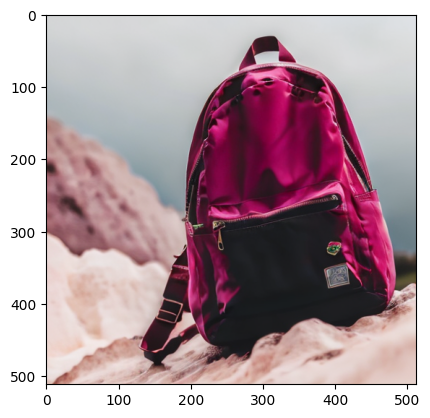

we are here


  0%|          | 0/50 [00:00<?, ?it/s]

a backpack</w> backpack on top of a wooden floor


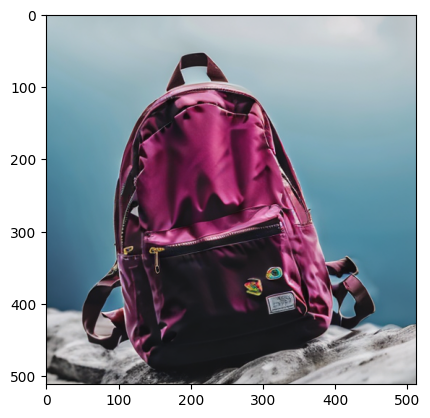

we are here


  0%|          | 0/50 [00:00<?, ?it/s]

a backpack</w> backpack with a city in the background


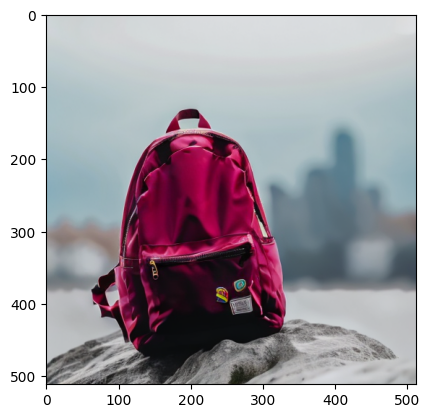

we are here


  0%|          | 0/50 [00:00<?, ?it/s]

a backpack</w> backpack with a mountain in the background


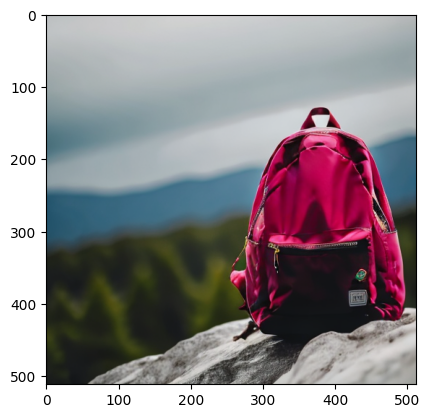

we are here


  0%|          | 0/50 [00:00<?, ?it/s]

a backpack</w> backpack with a blue house in the background


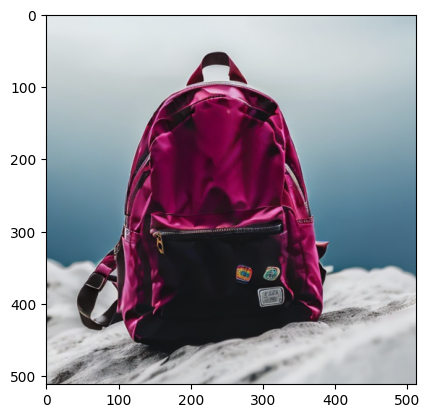

we are here


  0%|          | 0/50 [00:00<?, ?it/s]

a backpack</w> backpack on top of a purple rug in a forest


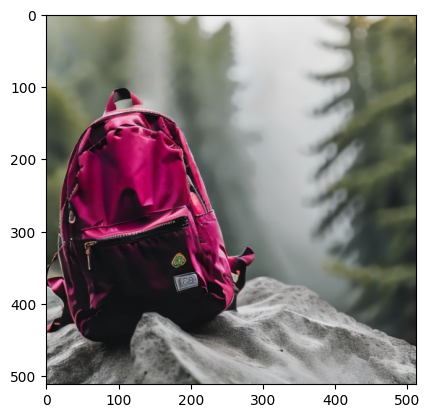

we are here


  0%|          | 0/50 [00:00<?, ?it/s]

a backpack</w> backpack with a wheat field in the background


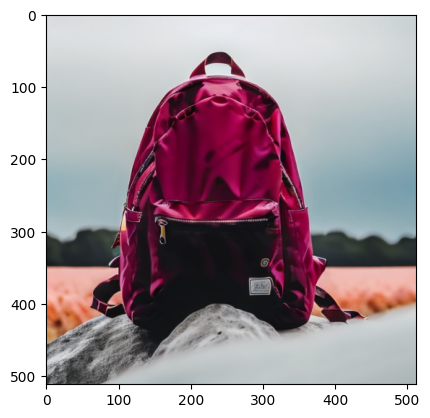

we are here


  0%|          | 0/50 [00:00<?, ?it/s]

a backpack</w> backpack with a tree and autumn leaves in the background


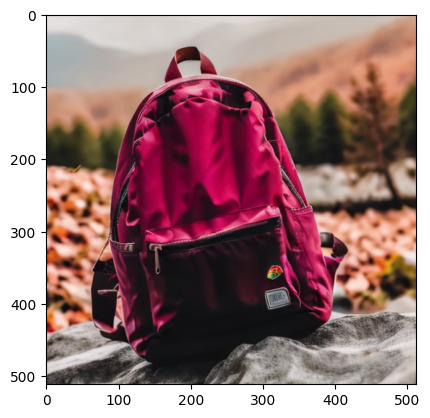

we are here


  0%|          | 0/50 [00:00<?, ?it/s]

a backpack</w> backpack with the Eiffel Tower in the background


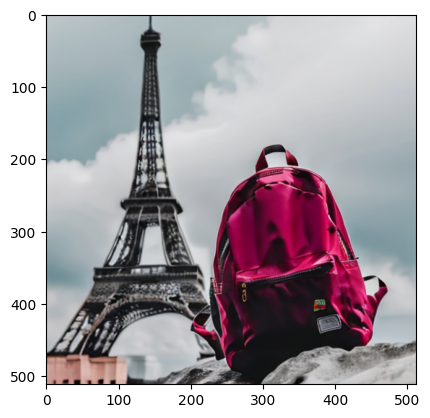

we are here


  0%|          | 0/50 [00:00<?, ?it/s]

a backpack</w> backpack floating on top of water


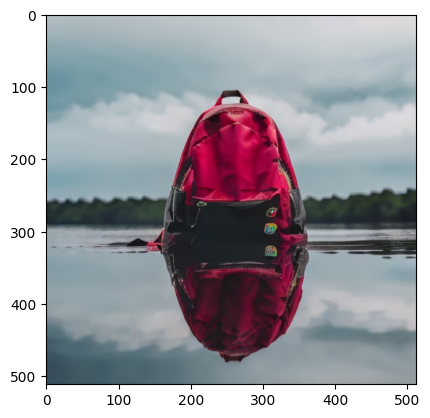

we are here


  0%|          | 0/50 [00:00<?, ?it/s]

a backpack</w> backpack floating in an ocean of milk


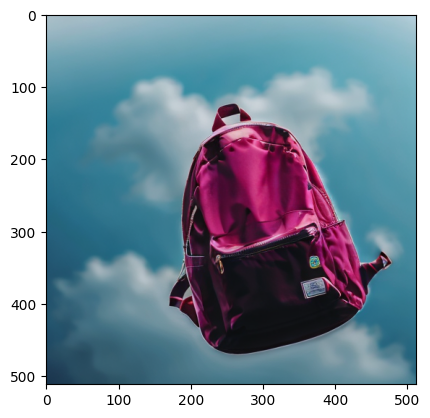

we are here


  0%|          | 0/50 [00:00<?, ?it/s]

a backpack</w> backpack on top of green grass with sunflowers around it


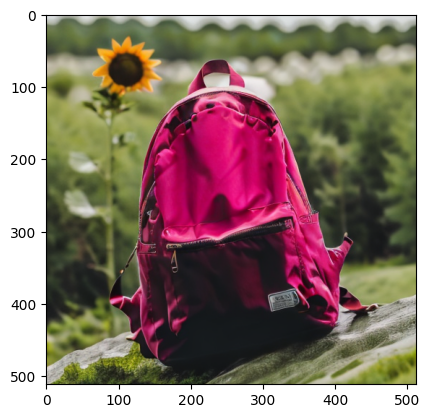

we are here


  0%|          | 0/50 [00:00<?, ?it/s]

a backpack</w> backpack on top of a mirror


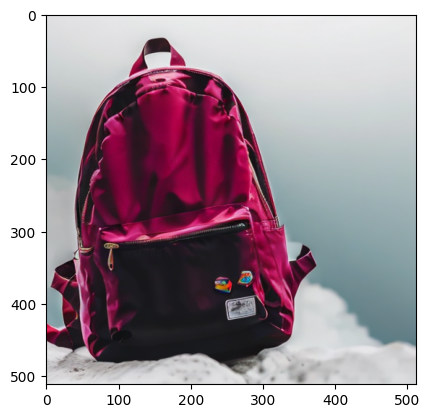

we are here


  0%|          | 0/50 [00:00<?, ?it/s]

a backpack</w> backpack on top of the sidewalk in a crowded street


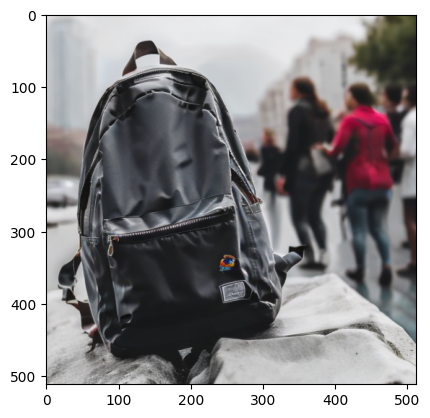

we are here


  0%|          | 0/50 [00:00<?, ?it/s]

a backpack</w> backpack on top of a dirt road


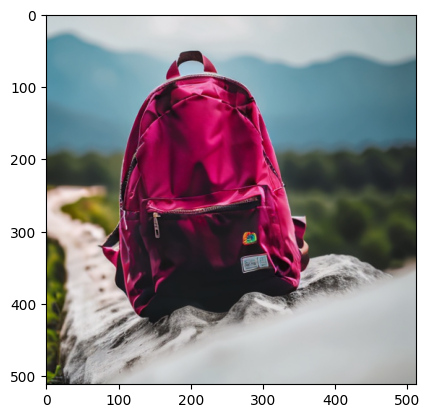

we are here


  0%|          | 0/50 [00:00<?, ?it/s]

a backpack</w> backpack on top of a white rug


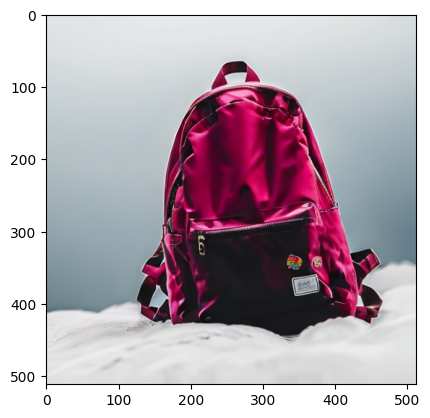

we are here


  0%|          | 0/50 [00:00<?, ?it/s]

a red backpack</w> backpack


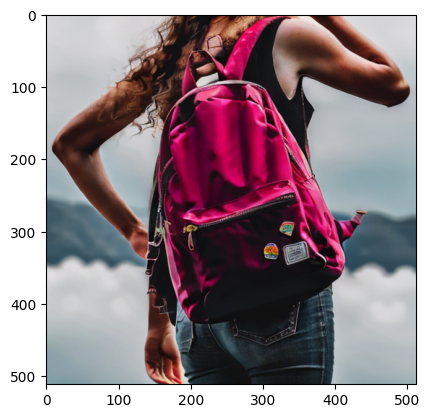

we are here


  0%|          | 0/50 [00:00<?, ?it/s]

a purple backpack</w> backpack


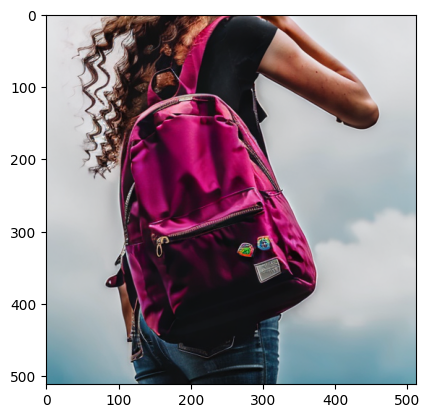

we are here


  0%|          | 0/50 [00:00<?, ?it/s]

a shiny backpack</w> backpack


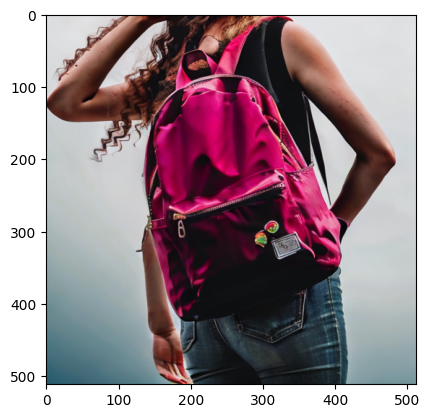

we are here


  0%|          | 0/50 [00:00<?, ?it/s]

a wet backpack</w> backpack


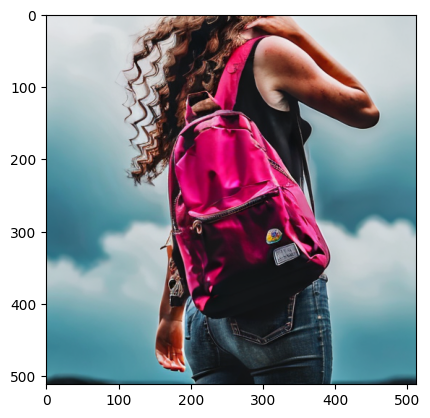

we are here


  0%|          | 0/50 [00:00<?, ?it/s]

a cube shaped backpack</w> backpack


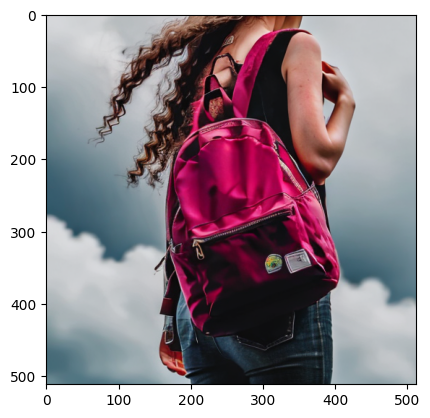

In [11]:
from visualization import joint_visualization
import matplotlib.pyplot as plt
for m in range(len(prompt_list)):
    prompt = prompt_list[m]
    image = joint_visualization(pipe, img_model, prompt, ref_image, guidance=7.0, eta=0.4, img_adapter=adapter, step=50)[0]
    print(prompt)
    plt.imshow(image)
    plt.show() 